In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os
import cv2

In [13]:
#Can only try 4,5 or 6 for i

i=4
#files=sorted(glob("/home/abubakr/Desktop/*sync*csv"))
files=sorted(glob("processed_data/*21*/"+str(i)+"*/*sync*csv"))
files

['processed_data/Nov_21/4/dataset4_2023_12_13_11_07_30_sync.csv',
 'processed_data/Nov_21/4/dataset4_2023_12_13_11_07_30_sync_imu.csv']

In [14]:
df1=pd.read_csv(files[0])
df2=pd.read_csv(files[1])

In [15]:
df1.head()

,Timestamp,Pose_X,Pose_Y,Pose_Z,Sonar_Distance_1,Sonar_Distance_2,Sonar_Distance_3,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z
0,2803255796,4.127794e-13,0.000511,-5.964905e-13,0.0,0.672481,2.0,-0.000715,-0.017578,0.000162
1,3569020509,1.851356e-13,0.001364,-1.433276e-12,0.0,0.671628,2.0,0.000229,-0.010234,0.003641
2,4320033073,6.209155e-06,0.002091,3.819494e-05,0.0,0.670947,2.0,0.001119,-0.015997,0.006589
3,5098167657,1.424390e-05,0.002674,4.181024e-05,0.0,0.672992,2.0,-0.003622,-0.017599,0.002734
4,5829230308,5.652899e-06,-0.001862,3.382411e-05,0.0,0.676742,2.0,-0.002703,-0.014483,0.005999


In [16]:
df2.head()

,Timestamp,IMU_Raw_x,IMU_Raw_y,IMU_Raw_z,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z
0,2099409818,-0.325816,-9.715968,-0.464090,0.001672,-0.014893,0.005113
1,2110099554,-0.331862,-9.711580,-0.469408,0.001401,-0.014237,0.006694
2,2118725538,-0.313864,-9.702442,-0.482854,0.000836,-0.013946,0.008320
3,2139114379,-0.322068,-9.713927,-0.474729,0.000799,-0.013899,0.009286
4,2149269819,-0.325772,-9.700094,-0.462100,0.001730,-0.014138,0.008011


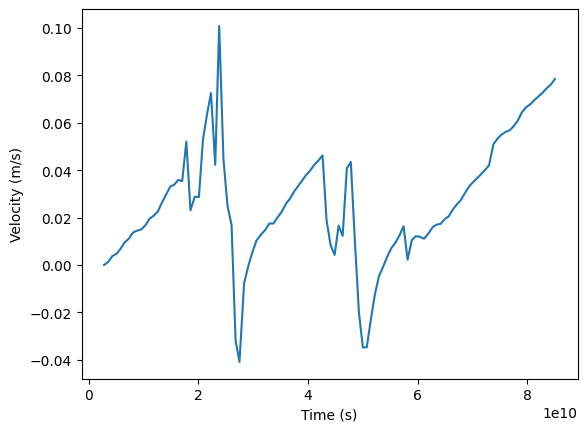

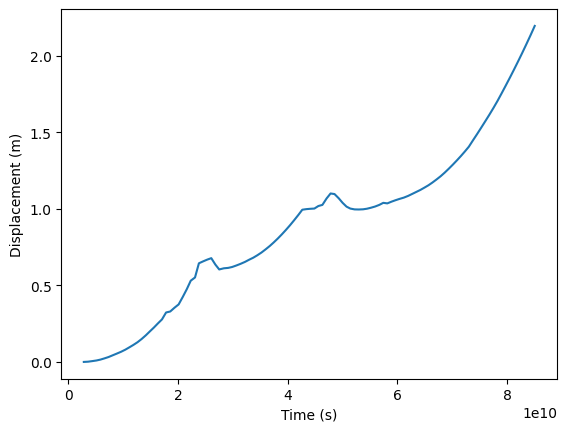

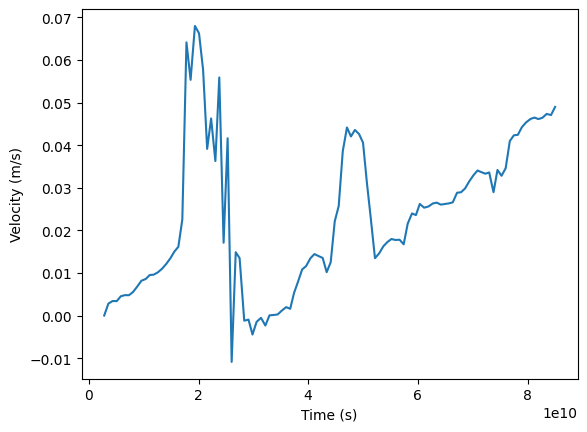

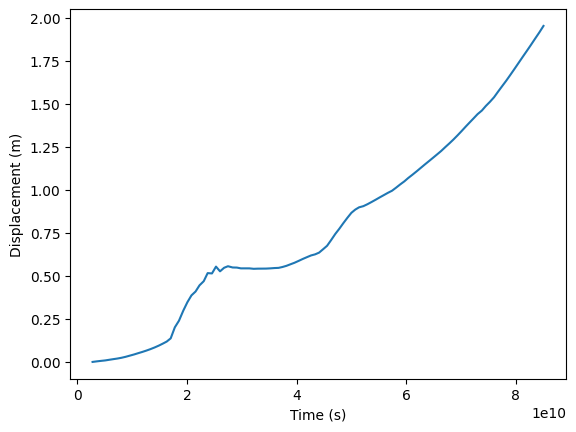

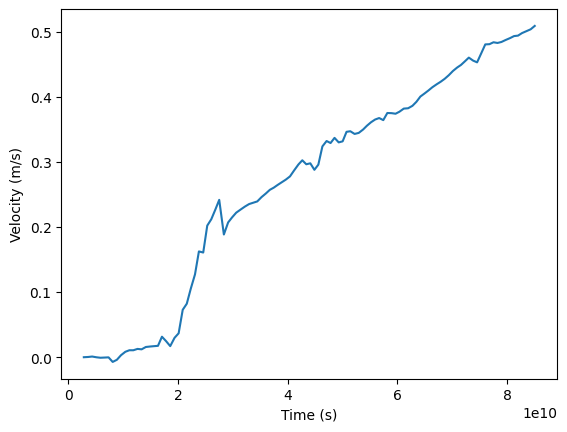

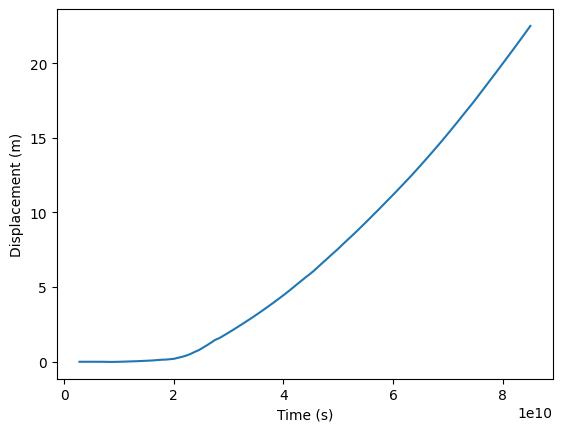

In [17]:
def create_v_d(accs,imus):
    vels=[]
    prev_time=imus.iloc[0]["Timestamp"]/np.power(10,9)
    bias=imus.iloc[0][accs]
    prev_acc=0
    prev_vel=0
    for x in imus.iloc:
    
            #Avg acc * dt = dv
        vel_d=0.5*(prev_acc+x[accs]-bias)*(x["Timestamp"]/np.power(10,9)-prev_time)
        vel=prev_vel+vel_d
        prev_vel=vel
        prev_time=x["Timestamp"]/np.power(10,9)
        vels.append(vel)
    plt.figure()
    plt.ylabel("Velocity (m/s)")
    plt.xlabel("Time (s)")
    plt.plot(imus.iloc[:]["Timestamp"],vels)
    i=0
    prev_s=0
    prev_time=imus.iloc[0]["Timestamp"]/np.power(10,9)
    dists=[]
    for x in imus.iloc:
    
            #Avg acc * dt = dv
        s=prev_s+vels[i]*(x["Timestamp"]/np.power(10,9)-prev_time)+0.5*0.5*(prev_acc+x[accs]-bias)*np.square(x["Timestamp"]/np.power(10,9)-prev_time)
        prev_s=s
        prev_vel=vel
        prev_time=x["Timestamp"]/np.power(10,9)
        dists.append(s)
        i+=1
    plt.figure()
    plt.ylabel("Displacement (m)")
    plt.xlabel("Time (s)")
    plt.plot(imus.iloc[:]["Timestamp"],dists)
    return vels,dists
z_v,z_d=create_v_d("IMU_Linear_Acc_Z",df1)
y_v,y_d=create_v_d("IMU_Linear_Acc_Y",df1)
x_v,x_d=create_v_d("IMU_Linear_Acc_X",df1)

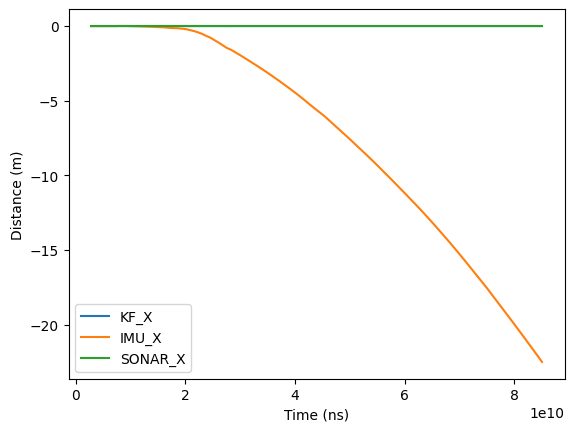

In [23]:
plt.plot(df1["Timestamp"],df1["Pose_X"]*-1)
plt.plot(df1["Timestamp"],np.array(x_d)*-1)
plt.plot(df1["Timestamp"],df1["Sonar_Distance_1"])
plt.legend(["KF_X","IMU_X","SONAR_X"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_x_kf.png")

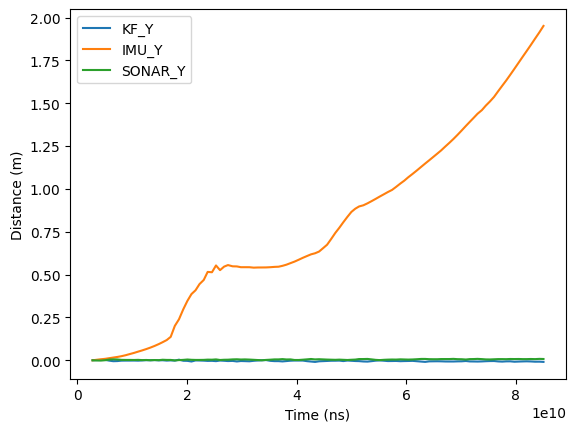

In [19]:
plt.plot(df1["Timestamp"],df1["Pose_Y"])
plt.plot(df1["Timestamp"],y_d)
plt.plot(df1["Timestamp"],df1["Sonar_Distance_2"]-df1["Sonar_Distance_2"][0])
plt.legend(["KF_Y","IMU_Y","SONAR_Y"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_y_kf.png")

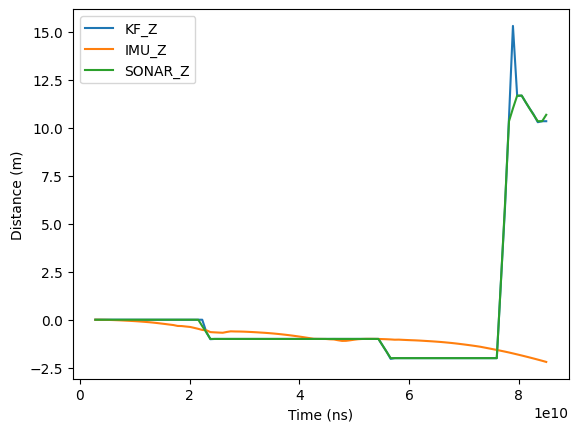

In [22]:
plt.plot(df1["Timestamp"],df1["Pose_Z"]*-1)
plt.plot(df1["Timestamp"],np.array(z_d)*-1)
plt.plot(df1["Timestamp"],df1["Sonar_Distance_3"]-df1["Sonar_Distance_3"][0])
plt.legend(["KF_Z","IMU_Z","SONAR_Z"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_z_kf.png")

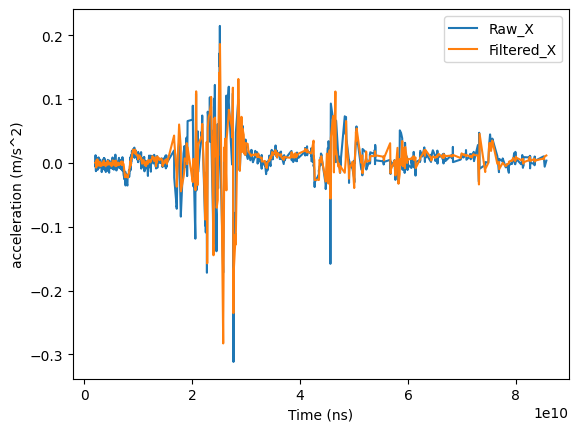

In [21]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_x"]-df2["IMU_Raw_x"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_X"]-df2["IMU_Linear_Acc_X"][0])*1)
plt.legend(["Raw_X","Filtered_X"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_x_bw.png")

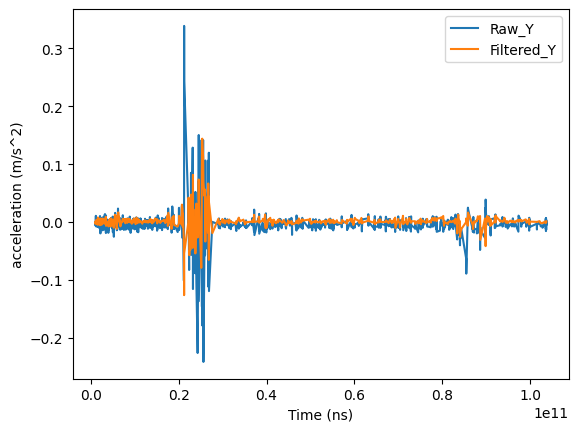

In [11]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_y"]-df2["IMU_Raw_y"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_Y"]-df2["IMU_Linear_Acc_Y"][0])*1)
plt.legend(["Raw_Y","Filtered_Y"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_y_bw.png")

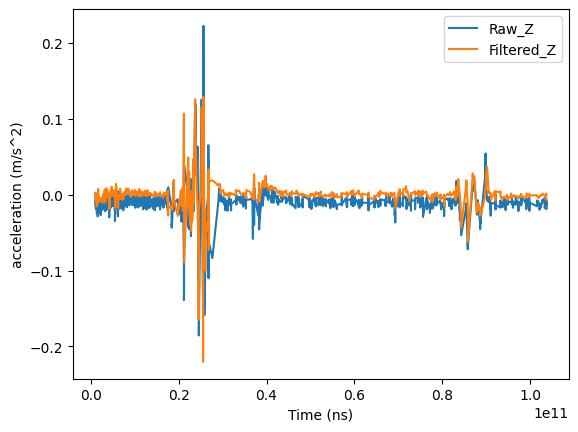

In [12]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_z"]-df2["IMU_Raw_z"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_Z"]-df2["IMU_Linear_Acc_Z"][0])*1)
plt.legend(["Raw_Z","Filtered_Z"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_z_bw.png")

# Other code

In [159]:
df3=pd.read_csv("/home/abubakr/Desktop/imu.csv")
df4=pd.read_csv("/home/abubakr/Desktop/imu2.csv")

In [92]:
df3.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.orientation.x,field.orientation.y,field.orientation.z,field.orientation.w,field.orientation_covariance0,field.orientation_covariance1,...,field.linear_acceleration.z,field.linear_acceleration_covariance0,field.linear_acceleration_covariance1,field.linear_acceleration_covariance2,field.linear_acceleration_covariance3,field.linear_acceleration_covariance4,field.linear_acceleration_covariance5,field.linear_acceleration_covariance6,field.linear_acceleration_covariance7,field.linear_acceleration_covariance8
0,1702464251867193783,62,1145229339,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1702464251870371765,63,1149715423,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.471815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1702464251873468098,64,1167288780,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.479011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1702464251875591263,65,1174196481,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.467270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1702464251877241763,66,1189620733,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.469086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
df4.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.vector.x,field.vector.y,field.vector.z
0,1702464251867193783,0,1145229339,NaN,-0.002749,0.011357,0.007850
1,1702464251870371765,0,1149715423,NaN,-0.002404,0.011406,0.007854
2,1702464251873468098,0,1167288780,NaN,-0.002086,0.011324,0.008056
3,1702464251875591263,0,1174196481,NaN,-0.001812,0.011153,0.008423
4,1702464251877241763,0,1189620733,NaN,-0.001596,0.010961,0.008897


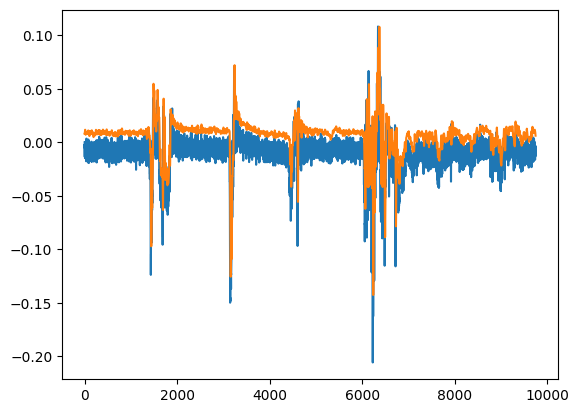

In [94]:
plt.plot(df3["field.linear_acceleration.z"]-df3["field.linear_acceleration.z"][0])
plt.plot(df4["field.vector.z"])

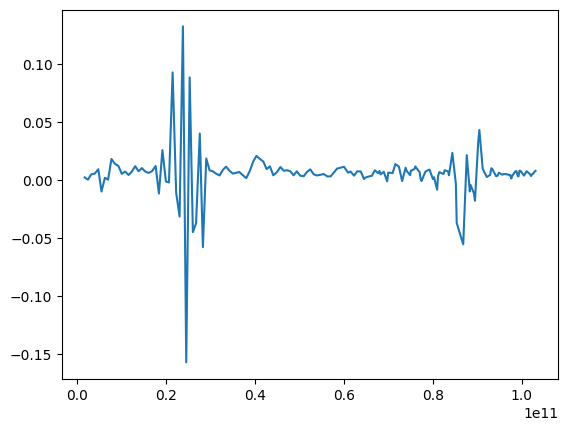

In [174]:
plt.plot(df1["Timestamp"],df1["IMU_Linear_Acc_Z"])

In [96]:
len(df4)

9745

In [97]:
len(df2)

1295